In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [131]:
# creating a function 'results' to output the r2_score() and mean_squared_error() values
def results(x,y):
    """
    x stands for y_test
    and y stands for y_pred
    """
    r2 = r2_score(x,y)
    mse = mean_squared_error(x,y)
    print(f"R2 : {r2} \n MSE : {mse}")

## Supervised



### Filter Based Methods                



#### Mutual Information

In [132]:
dataset = fetch_california_housing()

In [133]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [134]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [135]:
x = dataset['data']
y = dataset ['target']
feature_names = dataset['feature_names']

In [136]:
x.shape

(20640, 8)

In [137]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x,y,random_state=43)

In [138]:
x.shape

(20640, 8)

In [139]:
print(mi)

[0.38792528 0.03316623 0.1032511  0.02442028 0.02100028 0.07290862
 0.36920881 0.40190489]


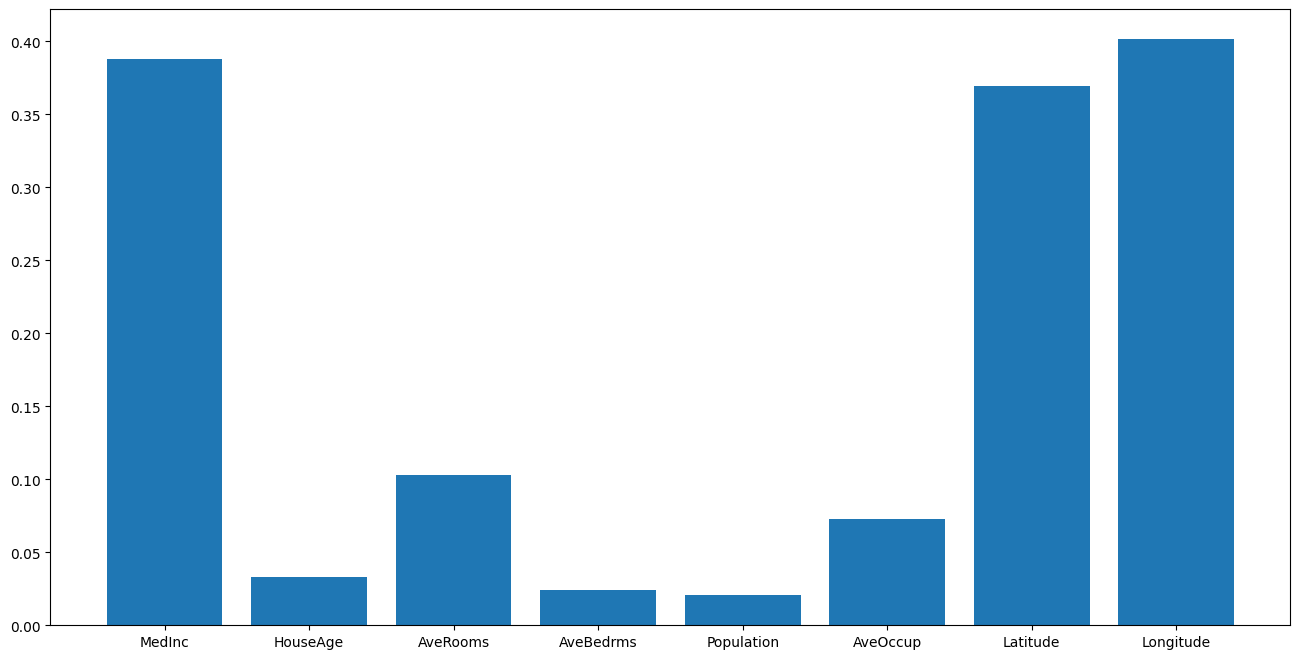

In [140]:
# Visualize Feature Selection
plt.figure(figsize = (16, 8))
plt.bar(feature_names,mi)
plt.show()

**We have two options - we could use either SelectPercentile() or SelectBest() classes to select the best features from the above mutual information.**

In [141]:
X_new = SelectKBest(mutual_info_regression, k = 5).fit_transform(x, y)
print(X_new.shape)

(20640, 5)


In [142]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20),random_state =43)

In [143]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.5912911717145897 
 MSE : 0.5450061964960146


#### The second , filter based method is Chi Squared , but it can be used only for classification , so we move ahead with the third method - Pearson Correlation

#### Pearson Correlation

**we can do this in two ways**

**(a) first analyse each feature with the target variable.**


In [144]:

from sklearn.feature_selection import f_regression, SelectKBest

In [145]:
X_new = SelectKBest(f_regression, k=5).fit_transform(x,y)

In [146]:
print(X_new.shape)

(20640, 5)


In [147]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20),random_state =43)

In [148]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.5602617170573737 
 MSE : 0.5863834408609572


**(b)Let us analyse the relationship between the feature themselves using the corr() method of the pandas library**

In [149]:
import pandas as pd

In [150]:
x_pd = pd.DataFrame(x, columns = feature_names)
x_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [151]:
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


**It is very clear that there is correlation between AveRooms and AveBedrms and ofcourse Latitude and Longitude are negatively correlated**

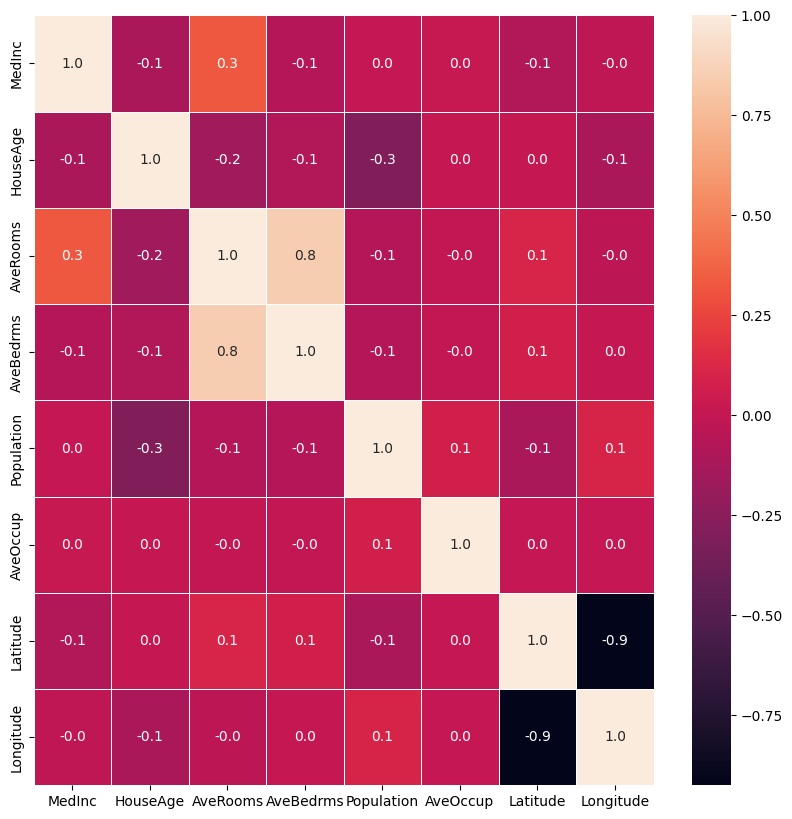

In [152]:
# how ever let us visualize these correlations
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(x_pd.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

In [153]:
# let us drop AveBedrooms
x_new = x_pd.drop('AveBedrms',axis =1)
x_new.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25


In [154]:
x_train, x_test,y_train, y_test = train_test_split(X_new, y, test_size=(0.20), random_state=43)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.5602617170573737 
 MSE : 0.5863834408609572


###  Wrapper Based Methods for feature selection

#### Recursive Feature Elimination

In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

#Regression
print(x.shape, y.shape) # remember x is the training dataset set of the California housing dataset and
#y is the target 'house value'


(20640, 8) (20640,)


In [156]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [157]:
X, y = fetch_california_housing(return_X_y = True)
feature_names = fetch_california_housing().feature_names


In [158]:
estimator = Lasso()
selector = RFE(estimator, n_features_to_select = 5, step =1).fit(X,y)
print(selector.ranking_)
print(selector)
print(selector.get_feature_names_out())

[1 1 4 3 1 2 1 1]
RFE(estimator=Lasso(), n_features_to_select=5)
['x0' 'x1' 'x4' 'x6' 'x7']


In [159]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [160]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.20,random_state=43)

In [161]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results(y_test,y_pred)

R2 : 0.6027870853411594 
 MSE : 0.5296765932986786


#### Select From Model

In [162]:
# Using estimators that assign weights to the features
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = np.logspace(-6,6, num=5)).fit(X,y)
importance = np.abs(ridge.coef_)
feature_names = np.array(fetch_california_housing().feature_names)

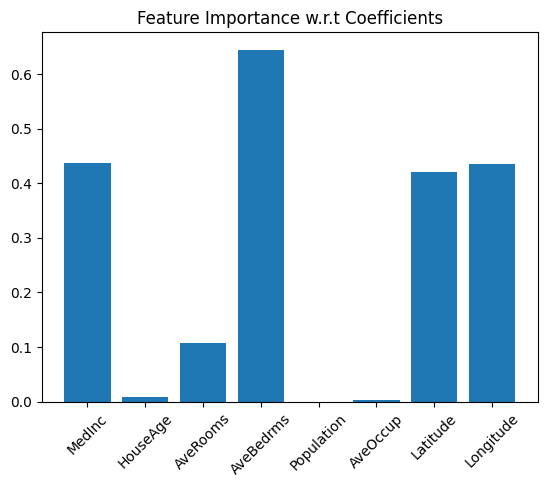

In [163]:
plt.bar(height = importance,x = feature_names)
plt.title("Feature Importance w.r.t Coefficients")
plt.xticks(rotation = 45)
plt.show()

**selecting features based on importance**
we select the top 4 important features according to the coefficients.

In [164]:
from sklearn.feature_selection import SelectFromModel
threshold = np.sort(importance)[-5] + 0.01 # we want to set the threshold of the 5th highest coefficient sightly large,
# so that SelectFromModel() class will select the top 4.
model_select = SelectFromModel(ridge, threshold = threshold).fit(X,y)
print(f"Features selected by SelectFromModel : {feature_names[model_select.get_support()]}")

Features selected by SelectFromModel : ['MedInc' 'AveBedrms' 'Latitude' 'Longitude']


#### Sequential Feature Selection

In [165]:
from sklearn.feature_selection import SequentialFeatureSelector
X,y = fetch_california_housing(return_X_y=True)
# ridge = RidgeCV().fit(X,y)

In [166]:
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select = 4, direction ="forward").fit(X,y)
sfs_backward = SequentialFeatureSelector(ridge,n_features_to_select=4, direction ="backward").fit(X,y)
print(f"Features selected by forward sequential selection : {feature_names[sfs_forward.get_support()]}")
print(f"Features selected by backward sequential selection : {feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection : ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms']
Features selected by backward sequential selection : ['MedInc' 'HouseAge' 'Latitude' 'Longitude']


Note that the forward and backward sequential selection have come up with different set of features.

In [167]:
sfs_forward

SequentialFeatureSelector(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                          n_features_to_select=4)

**First we will try with the features from the sfs_forward object**

In [168]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [169]:
## let us use these set of features on the Linear Regression model
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2,random_state =43 )
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results(y_test, y_pred)

R2 : 0.5594921554932742 
 MSE : 0.5874096379773222


**Now we will try with the features from sfs_backward object**

In [170]:
X_new = sfs_backward.transform(X)
X_new.shape

(20640, 4)

In [171]:
## Let us use these set of features on the Linear Regression model
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2,random_state=43)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
results(y_test, y_pred)

R2 : 0.6028208055323141 
 MSE : 0.52963162800345


**As we can see that now we have a lower MSE and a high R2 score from the backward selection when compared to  forward selection**

###  Embedded method (Lasso and Random Forests) for feature selection.
 **In the Embedded method, the feature selection happens as part of the function of the algorithm itself**

#### Lasso Regularization : A model which has a feature selection method embedded in it.

In [172]:
X , y = fetch_california_housing(return_X_y=True)
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state=43)

In [173]:
w = []
r2 = []
mse =[]
alpha_list = [0, 0.1,0.25, 0.5,1, 2]

for alpha in alpha_list:
    #fit model
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)

    # prediction
    y_pred = model.predict(x_test)

    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())
    mse.append(mean_squared_error(y_test,y_pred))

<ipython-input-173-8d0e61f7a200>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.360e+03, tolerance: 2.198e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [174]:
feature_names = fetch_california_housing().feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

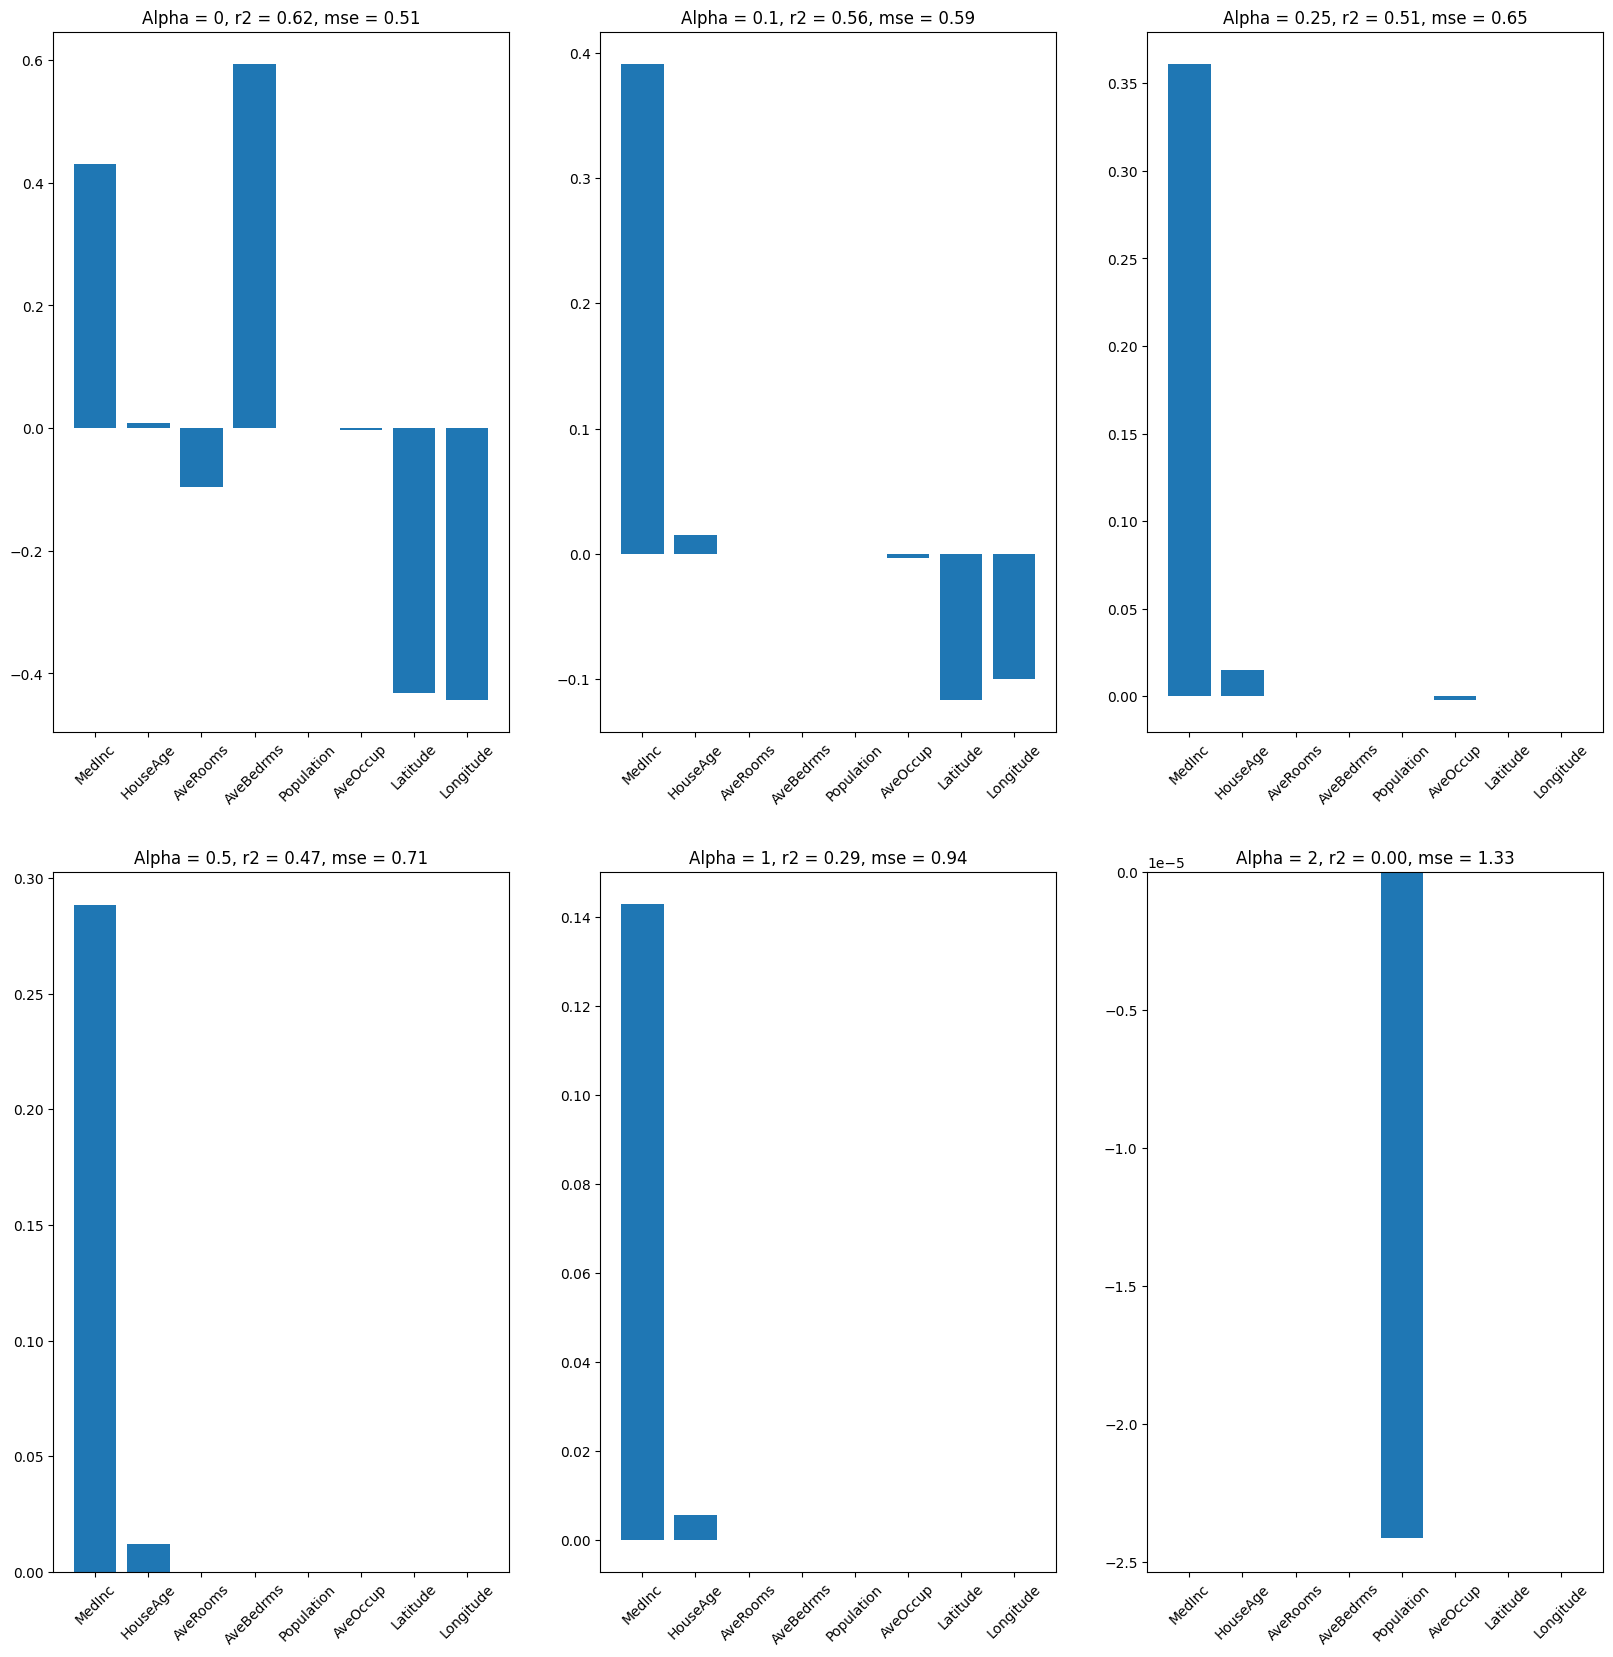

In [175]:
# visualizing feature selection
plt.figure(figsize=(20, 20))
for i in range(len(alpha_list)):
    plt.subplot(2, 3, i+1)
    plt.bar(feature_names,w[i])
    plt.xticks(rotation=45)
    plt.title(f"Alpha = {alpha_list[i]}, r2 = {r2[i]:.2f}, mse = {mse[i]:.2f}")
plt.show()

 **From the above graph, median income seems to be the most important feature, followed by house age and then by the geographical place of the house. We can also notice that the r2 scores starts dropping after removing more than 5  features**

#### Random Forests : Let us try with Random Forests, which is a model  which has a feature selection method embedded in it

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [177]:
X,y = fetch_california_housing(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=43)


In [178]:
""" we will now specify the parameter space within which the algorithm will run.
For which we will define a dictionary, menitioning the range for the number
of esitmators and the maxium depth each tree will run.

"""
param_distributions = {
    'n_estimators': randint(1,5),
    'max_depth': randint(5,10)
}
"""we will now do a cross validation search within the above parameter space
and come up with the best parameters
"""
search = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 43),
                            n_iter =5,
                            param_distributions = param_distributions,
                            random_state =43
                            )
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=43), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab9fd24af20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab9fbb984f0>},
                   random_state=43)

In [179]:
## every model has its own attributes from which we can find out the parameters
print(dir(search))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_validate_data', '_validate_params', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_iter', 'n_jobs', 'n_splits_', 'param_distrib

In [180]:
search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=4, random_state=43)

In [181]:
search.cv_results_

{'mean_fit_time': array([0.08377829, 0.11314902, 0.07521996, 0.15249143, 0.28670821]),
 'std_fit_time': array([0.00523589, 0.00241366, 0.01292765, 0.00883662, 0.00594308]),
 'mean_score_time': array([0.00230489, 0.00226221, 0.00217824, 0.00252762, 0.00433221]),
 'std_score_time': array([0.00014315, 0.00011325, 0.00016221, 0.00011116, 0.00128231]),
 'param_max_depth': masked_array(data=[9, 6, 7, 8, 8],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 2, 1, 2, 4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 9, 'n_estimators': 1},
  {'max_depth': 6, 'n_estimators': 2},
  {'max_depth': 7, 'n_estimators': 1},
  {'max_depth': 8, 'n_estimators': 2},
  {'max_depth': 8, 'n_estimators': 4}],
 'split0_test_score': array([0.62791319, 0.65888373, 0.6293361 , 0.68956324, 0.72809837]),
 'split1_test_score': ar

**we can see form the above output, the best score of .73 is achieved with the combination of max_depth : 8 and n_estimators : 4, in all the 5 iterations**

In [182]:

## we can also find out the best parameters that the randomized search has provided us with the 'best_params_' attribute
search.best_params_

{'max_depth': 8, 'n_estimators': 4}

In [183]:
y_pred = search.predict(X_test)

In [184]:
results(y_test,y_pred)

R2 : 0.7482181656585591 
 MSE : 0.33429095543749554


In [185]:
search.score(X_test,y_test)

0.7482181656585591

## UnSupervised - Dimensionality Reduction

**PCA**

In [186]:
from sklearn.decomposition import PCA
X , y = fetch_california_housing(return_X_y=True)
X_new = PCA(n_components =4, svd_solver = 'full').fit_transform(X)
print(X_new.shape)

(20640, 4)


In [187]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=43 )
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results(y_test, y_pred)

R2 : 0.01219443735013459 
 MSE : 1.3172217366478318
